## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [41]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [42]:
import pandas as pd
import numpy as np
#1
N=15_000
df=pd.read_csv('~/data/data_000637.txt',nrows=N)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
14995,1,1,4,3869200316,3399,9
14996,1,1,17,3869200316,3400,15
14997,1,1,10,3869200316,3530,16
14998,1,1,8,3869200316,3533,18


In [43]:
#2
x=max(df.BX_COUNTER)
print('The x value is:',x)

The x value is: 3563


In [44]:
#3
n_tot=pd.read_csv('~/data/data_000637.txt').shape
print(n_tot[0]-df.shape[0])

1295720


In [45]:
#4 Create a new column with the absolute time 
#  in ns (as a combination of the other three columns with timing information).
df['TOT_TIME [s]']=df.TDC_MEAS.values*25/30+df.BX_COUNTER.values*25+df.ORBIT_CNT.values*25*x*1e-9

df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TOT_TIME [s]
0,1,0,123,3869200167,2374,26,404020.671542
1,1,0,124,3869200167,2374,27,404021.504876
2,1,0,63,3869200167,2553,28,408497.338209
3,1,0,64,3869200167,2558,19,408614.838209
4,1,0,64,3869200167,2760,25,413669.838209
...,...,...,...,...,...,...,...
14995,1,1,4,3869200316,3399,9,429631.518148
14996,1,1,17,3869200316,3400,15,429661.518148
14997,1,1,10,3869200316,3530,16,432912.351481
14998,1,1,8,3869200316,3533,18,432989.018148


In [46]:
#5
v=np.random.randint(0,2,df.shape[0])
df.HEAD=v
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TOT_TIME [s]
0,0,0,123,3869200167,2374,26,404020.671542
1,1,0,124,3869200167,2374,27,404021.504876
2,1,0,63,3869200167,2553,28,408497.338209
3,0,0,64,3869200167,2558,19,408614.838209
4,0,0,64,3869200167,2760,25,413669.838209
...,...,...,...,...,...,...,...
14995,1,1,4,3869200316,3399,9,429631.518148
14996,0,1,17,3869200316,3400,15,429661.518148
14997,0,1,10,3869200316,3530,16,432912.351481
14998,0,1,8,3869200316,3533,18,432989.018148


In [47]:
#6
df=df[df.HEAD==1]

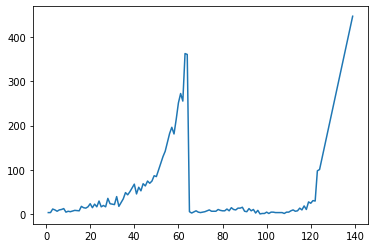

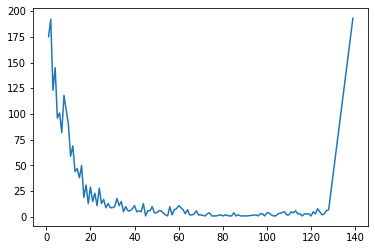

In [48]:
#7
#Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel
FPGA_1=df[df.FPGA==1]
FPGA_0=df[df.FPGA==0]

import matplotlib.pyplot as plt

for f in [FPGA_0,FPGA_1]:
    x=np.sort(f.TDC_CHANNEL.unique())
    y=[f[f.TDC_CHANNEL==i].shape[0] for i in x]
    fig = plt.figure()
    plt.plot(x,y)

In [75]:
#8
#Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)
df_1=df.groupby(['TDC_CHANNEL']).sum().reset_index()

df_1=df_1.sort_values(by=['HEAD'],ascending=False)
df_1=df_1.head(3)

print('The noisiest CHNL are ',df_1.TDC_CHANNEL.values)


The noisiest CHNL are  [139  64  63]


In [50]:
#9.  Count the number of unique orbits. Count the number of unique orbits with at least one measurement 
#    from TDC_CHANNEL=139

print('Number of unique orbits',len(df.ORBIT_CNT.unique()))
ris=df[df.TDC_CHANNEL==139]
print(ris)
ris=ris.shape[0]
print('Number of unique orbits with at least one measurement from TDC_CHANNEL=139',ris)

Number of unique orbits 150
       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
7         1     0          139  3869200167        2776         0   
15        1     1          139  3869200167        2797         0   
39        1     0          139  3869200167        3186         0   
48        1     0          139  3869200168          23         0   
56        1     1          139  3869200168         272         0   
...     ...   ...          ...         ...         ...       ...   
14922     1     0          139  3869200316          21         0   
14938     1     0          139  3869200316         233         0   
14940     1     1          139  3869200316         237         0   
14989     1     1          139  3869200316        3398         0   
14999     1     0          139  3869200316        3539         0   

        TOT_TIME [s]  
7      414049.004876  
15     414574.004876  
39     424299.004876  
48     345224.004965  
56     351449.004965  
...              